In [1]:
import pandas as pd

insurance_data =  pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")

In [2]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [3]:
insurance_data

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0
...,...,...,...,...,...,...,...,...,...,...,...
48255,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,CHINA,44.0,0.00,NaN,36,0
48256,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,NaN,43,0
48258,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,NaN,61,0


In [4]:
#q1 missing values?
insurance_data.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

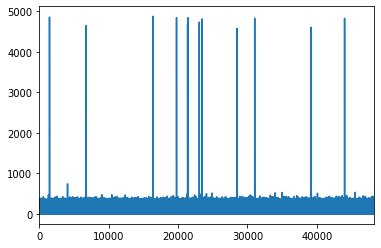

In [5]:
insurance_data['Duration'].plot()


In [6]:
nums = insurance_data.select_dtypes('number')
nums[nums<0].dropna() #no columns with negative values

,Duration,Net Sales,Commision (in value),Age,Claim


In [7]:
# are most customers claiming insurance male? Nope
insurance_data[insurance_data['Claim']==1]['Gender'].value_counts()

F    255
M    228
Name: Gender, dtype: int64


    Fill the missing values in 'Gender' column with 'Not Specified' X
    Drop 'Distribution Channel', 'Destination' and 'Agency Type'. X
    Perform one hot encoding for 'Agency','Gender','Product Name' using sklearn
    Separate dependent and independent features X 
    Split the data into training and test set with test_size = 0.3 and random_state = 101
    As the data has imbalanced classes, use smote to equalize the classes on training set splitted in operation 5. Use random_state = 25 and sampling_strategy = 1.0 while initializing smote.



In [8]:
insurance_data.drop(columns=['Distribution Channel', 'Destination','Agency Type'], inplace=True)
insurance_data['Gender']=insurance_data['Gender'].fillna('Not Specified')

In [9]:
insurance_data

,Agency,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Rental Vehicle Excess Insurance,61,19.8,11.88,Not Specified,29,0
1,EPX,Cancellation Plan,93,63.0,0.00,Not Specified,36,0
2,EPX,2 way Comprehensive Plan,22,22.0,0.00,Not Specified,25,0
3,C2B,Silver Plan,14,54.5,13.63,M,24,0
4,EPX,Cancellation Plan,90,10.0,0.00,Not Specified,23,0
...,...,...,...,...,...,...,...,...
48255,EPX,2 way Comprehensive Plan,39,44.0,0.00,Not Specified,36,0
48256,C2B,Bronze Plan,20,60.0,15.00,F,30,0
48257,CWT,Rental Vehicle Excess Insurance,19,29.7,17.82,Not Specified,43,0
48258,EPX,2 way Comprehensive Plan,7,20.0,0.00,Not Specified,61,0


In [10]:
from imblearn.over_sampling import SMOTE

In [11]:

X = insurance_data.drop(columns='Claim')
y = insurance_data['Claim']

# One hot encode ['Agency','Gender','Product Name'] using pd.get_dummies
X = pd.get_dummies(X)

# # Separate using test train split test_size = 0.3 and random_state = 101
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=101)

# # As the data has imbalanced classes, use smote to equalize the classes on training set splitted in operation 5. Use random_state = 25 and sampling_strategy = 1.0 while initializing smote.
sm = SMOTE(random_state = 25, sampling_strategy = 1.0)
Xtrain, ytrain = sm.fit_sample(Xtrain, ytrain)

In [12]:
LR = LogisticRegression(max_iter=100)
LR.fit(Xtrain, ytrain)

C:\Users\way\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [13]:
LR.score(Xtrain, ytrain), sklearn.metrics.f1_score(ytrain, LR.predict(Xtrain))

(0.8424058432775257, 0.8290567637181702)

In [14]:
#test
LR.score(Xtest,ytest), sklearn.metrics.f1_score(ytest, LR.predict(Xtest))

(0.9152507252382925, 0.09446494464944649)

In [15]:
# Q4 Decision Tree model
DT = DecisionTreeClassifier(random_state=1)
DT.fit(Xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [16]:
#Accuracy, f1 of train
DT.score(Xtrain, ytrain),sklearn.metrics.f1_score(ytrain, DT.predict(Xtrain))

(0.9942889777270132, 0.994290007513148)

In [17]:
#Accuracy, f1 of test
DT.score(Xtest, ytest),sklearn.metrics.f1_score(ytest, DT.predict(Xtest))

(0.9560022102500345, 0.06734992679355783)

# q5 Random Forest 

In [18]:
RF = RandomForestClassifier(random_state=1)
RF.fit(Xtrain, ytrain)

RandomForestClassifier(random_state=1)

In [19]:
RF.score(Xtrain, ytrain),sklearn.metrics.f1_score(ytrain, RF.predict(Xtrain))

(0.9942889777270132, 0.9942985746436609)

In [20]:
RF.score(Xtest, ytest),sklearn.metrics.f1_score(ytest, RF.predict(Xtest))

(0.9636690150573284, 0.06405693950177936)

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
g1_params = {'bootstrap': [True],
'max_depth': [10, 20],
'min_samples_leaf': [3, 4],
'min_samples_split': [4, 6],
'n_estimators': [100, 200]}

grid1 = GridSearchCV(RandomForestClassifier(random_state=1), g1_params, cv=3, n_jobs=-1, verbose=2)
grid1.fit(Xtrain, ytrain)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200]},
             verbose=2)

In [23]:
grid1.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [24]:
grid1.score(Xtrain,ytrain)

0.9790645946677087

In [25]:
g2_params = {
    'max_leaf_nodes': [5, 10, 15, 20],
    'min_samples_split': [4, 6, 8, 10]}

grid2 = GridSearchCV(DecisionTreeClassifier(random_state=1), g2_params, cv=3, n_jobs=-1, verbose=2)
grid2.fit(Xtrain, ytrain)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.5s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_leaf_nodes': [5, 10, 15, 20],
                         'min_samples_split': [4, 6, 8, 10]},
             verbose=2)

In [26]:
grid2.best_params_

{'max_leaf_nodes': 20, 'min_samples_split': 4}

In [27]:
sklearn.metrics.f1_score(ytest, grid1.predict(Xtest))

0.08481532147742818

In [28]:
sklearn.metrics.f1_score(ytest, grid2.predict(Xtest))

0.0881201044386423

In [29]:
from sklearn.feature_selection import RFE

In [30]:
RF = RandomForestClassifier(random_state=1)

In [31]:
feature_elim = RFE(RF,step=1)

In [32]:
feature_elim.fit(Xtrain, ytrain)

RFE(estimator=RandomForestClassifier(random_state=1))

In [34]:
feature_elim.score(Xtest,ytest)

0.962011327531427

In [36]:
feature_elim.score(Xtrain,ytrain), sklearn.metrics.f1_score(ytrain, feature_elim.predict(Xtrain))

(0.9942739487210316, 0.994283656659315)

In [37]:
feature_elim.score(Xtest,ytest), sklearn.metrics.f1_score(ytest, feature_elim.predict(Xtest))

(0.962011327531427, 0.06462585034013606)

In [39]:
sum(feature_elim.support_)

24

In [40]:
feature_elim.ranking_

array([ 1,  1,  1,  1, 20,  7,  1, 17, 13, 21,  1,  1,  6,  1,  5,  1,  4,
        8,  2, 19,  1,  1, 12, 14,  1, 23, 15, 16,  1,  1,  1, 25,  1,  3,
       22, 11,  1,  1, 10, 18,  9, 24,  1,  1, 26,  1,  1,  1,  1])

In [41]:
Xtrain.columns

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Agency_ADM',
       'Agency_ART', 'Agency_C2B', 'Agency_CBH', 'Agency_CCR', 'Agency_CSR',
       'Agency_CWT', 'Agency_EPX', 'Agency_JWT', 'Agency_JZI', 'Agency_KML',
       'Agency_LWC', 'Agency_RAB', 'Agency_SSI', 'Agency_TST', 'Agency_TTW',
       'Product Name_1 way Comprehensive Plan',
       'Product Name_2 way Comprehensive Plan', 'Product Name_24 Protect',
       'Product Name_Annual Gold Plan', 'Product Name_Annual Silver Plan',
       'Product Name_Annual Travel Protect Gold',
       'Product Name_Annual Travel Protect Platinum',
       'Product Name_Annual Travel Protect Silver', 'Product Name_Basic Plan',
       'Product Name_Bronze Plan', 'Product Name_Cancellation Plan',
       'Product Name_Child Comprehensive Plan',
       'Product Name_Comprehensive Plan', 'Product Name_Gold Plan',
       'Product Name_Individual Comprehensive Plan',
       'Product Name_Premier Plan',
       'Product Name_Rental Vehicle E

# Datathon submission: Using one of the above models to predict

In [146]:
# training data: use the whole set

Xtrain = insurance_data.drop(columns='Claim')
ytrain = insurance_data['Claim']

# One hot encode ['Agency','Gender','Product Name'] using pd.get_dummies
Xtrain = pd.get_dummies(Xtrain)

# # As the data has imbalanced classes, use smote to equalize the classes on training set splitted in operation 5. Use random_state = 25 and sampling_strategy = 1.0 while initializing smote.
sm = SMOTE(random_state = 25, sampling_strategy = 0.25)
Xtrain, ytrain = sm.fit_sample(Xtrain, ytrain)

In [147]:
# To ADD: cross validation split to perform model selection

In [148]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [149]:
test_data.drop(columns=['Distribution Channel', 'Destination','Agency Type'], inplace=True)
test_data.fillna('Not Specified', inplace=True)
td = pd.get_dummies(test_data)
td['Product Name_Travel Cruise Protect Family'] = 0

In [150]:
import numpy as np
isin = np.isin(Xtrain.columns, td.columns)
Xtrain.columns[isin != True]

Index([], dtype='object')

In [151]:
# Use RFE and best parameters together
rf_params = {'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

RF2 = RandomForestClassifier(**rf_params)
# estimator = RF2.fit(Xtrain, ytrain)
estimator = RFE(RF2, step=1)
estimator.fit(Xtrain, ytrain)

RFE(estimator=RandomForestClassifier(max_depth=20, min_samples_leaf=3,
                                     min_samples_split=4))

In [152]:
results = pd.DataFrame(estimator.predict(td), columns = ['prediction'])
pd.value_counts(results['prediction'])

0    14442
1     1390
Name: prediction, dtype: int64

In [153]:
train_results = estimator.predict(Xtrain)

In [154]:
from sklearn.metrics import classification_report
print(classification_report(ytrain, train_results))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     47552
           1       0.97      0.88      0.93     11888

    accuracy                           0.97     59440
   macro avg       0.97      0.94      0.96     59440
weighted avg       0.97      0.97      0.97     59440



In [155]:
ytrain.value_counts()

0    47552
1    11888
Name: Claim, dtype: int64

In [156]:
results.to_csv('./results.csv', index=False)

In [ ]:
 # Ensemble some models together? 
    
#Fix high rate of False Positives, worsening the F1 score 
# try cross validation to select model parameters using F1 score as the evaluation metric, not accuracy!